# Random Forest : White Wine Quality
I worked with the white wine quality dataset from the UCI Machine Learning Repository in this project. Although the dataset already has wine quality values, I still used various features from the dataset to predict the quality of the wine. I ran the random forest algorithm, predicted the wine quality, and compared as well as visualized the model performance.
###### Dataset:
 - **winequality-white**: columns names 
   - fixed acidity
   - volatile acidity
   - citric acid
   - residual sugar'
   - chlorides
   - free sulfur dioxide
   - total sulfur dioxide
   - density
   - pH
   - sulphates
   - alcohol
   - quality

### Modules

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

### Load Data

In [2]:
# Reading the csv file
df = pd.read_csv('winequality-white.csv', delimiter=';')

# Printing the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Build and Run Model

In [3]:
# Model
model = RandomForestClassifier()

# Features for training and testing data
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

# Predicting the quality
outcome = 'quality'

# Splitting data, 70% for training and 30% for tetsing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[outcome], test_size=.3)

# Hyperparameters
paramGrid = {'max_depth' : [1, 5, 10],
            'max_features' : [1, 2, 3],
            'n_estimators' : [100]}

# Run random forest model and perform cross validation
gridSearchCV = GridSearchCV(estimator=model, param_grid=paramGrid, cv=5)
gridSearchCV.fit(X_train[features], y_train)

# Created new data frame for tested data and predicted values
results = pd.DataFrame({'quality' : y_test,
                        'fixed acidity' : X_test['fixed acidity'],
                        'volatile acidity' : X_test['volatile acidity'],
                        'citric acid' : X_test['citric acid'],
                        'residual sugar' : X_test['residual sugar'],
                        'chlorides' : X_test['chlorides'],
                        'free sulfur dioxide' : X_test['free sulfur dioxide'],
                        'total sulfur dioxide' : X_test['total sulfur dioxide'],
                        'density' : X_test['density'], 
                        'pH' : X_test['pH'],
                        'sulphates' : X_test['sulphates'],
                        'alcohol' : X_test['alcohol'],
                       'prediction' : gridSearchCV.predict(X_test)})

/Users/chandratamang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [4]:
# Printing first five rows of the new data frame
results.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction
2150,6,7.0,0.240,0.34,3.00,0.035,36.0,102.0,0.99050,3.18,0.43,12.2,6
3457,7,6.1,0.105,0.31,1.30,0.037,55.0,145.0,0.99120,3.41,0.41,11.1,7
1357,6,6.3,0.290,0.40,6.50,0.039,43.0,167.0,0.99530,3.15,0.44,9.3,5
3092,6,7.6,0.270,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3335,6,6.9,0.380,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,5


### Model Performance and Visualization

In [5]:
# Accuracy
accuracy = accuracy_score(results['quality'], results['prediction'])
print("Accuracy:", accuracy)

# Precision
precision = precision_score(results['quality'], results['prediction'], average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(results['quality'], results['prediction'], average='weighted')
print('Recall:', recall)

# F1 Score
score = f1_score(results['quality'], results['prediction'], average='weighted')
print('F1 Score:', score)

Accuracy: 0.6408163265306123
Precision: 0.656478728189191
Recall: 0.6408163265306123
F1 Score: 0.6175360798474253


/Users/chandratamang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Created confusion matrix for quality(y_test) and prediction
confusionMatrix = confusion_matrix(results['quality'], results['prediction'])
confusionMatrix

array([[  0,   0,   4,   3,   0,   0,   0],
       [  0,   3,  28,  14,   0,   0,   0],
       [  0,   3, 297, 151,   1,   0,   0],
       [  0,   0,  99, 527,  26,   0,   0],
       [  0,   0,   6, 146, 109,   0,   0],
       [  0,   0,   0,  30,  16,   6,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

Text(0.5, 1.0, 'Predicted quality vs Actual quality')

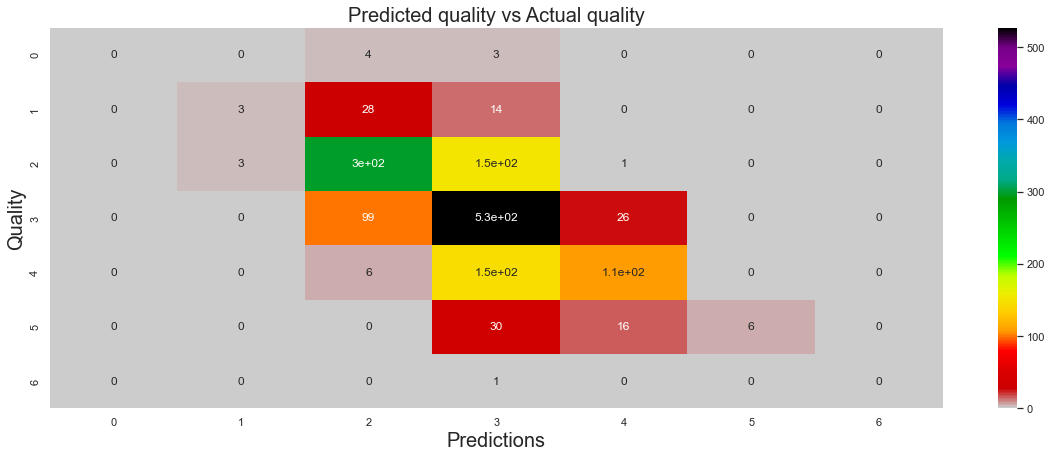

In [7]:
# Change graph size
sns.set(rc = {'figure.figsize':(20,7)})

# Visualizing confusion matrix with seaborn - heat map
heatMap = sns.heatmap(confusionMatrix, annot=True, cmap='nipy_spectral_r')

# Set the x, y, and title to meaningful lables
heatMap.set_xlabel('Predictions', fontsize = 20)
heatMap.set_ylabel('Quality', fontsize = 20)
heatMap.set_title('Predicted quality vs Actual quality', fontsize = 20)